In [2]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [2]:
prompt6 = "Simulate 1A3N and 7VDE (two PDB IDs matching hemoglobin) with identical parameters. Find the appropriate parameters for simulating hemoglobin from the literature. Then, plot the radius of gyration throughout both simulations."
paper_dir = "paper_collection"
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, paper_dir=paper_dir)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-10-08
time: 20:32:04
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
# Parameters
llm_var = "gpt-3.5-turbo-0125"


In [4]:
agent.run(prompt6)

Thought:

 First,

 I need to find

 the appropriate parameters for

 simulating hemoglobin

 from the literature.



Action

:
```
{


  "

action": "Liter

atureSearch",
 

 "action_input":

 "hemoglobin

 simulation parameters"
}


```



Paper Directory /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/notebooks/experiments/experiment_k1/exp_box/paper_collection


/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `PromptTokensDetails` but got `dict` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


[20:32:12] Starting paper search for 'hemoglobin simulation computational model, 2015-2024  '.

           paper_search for query 'hemoglobin simulation computational model, 2015-2024  ' returned 8 papers.

           Status: Paper Count=8 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           Starting paper search for 'molecular dynamics of hemoglobin, 2010-2020  '.

           paper_search for query 'molecular dynamics of hemoglobin, 2010-2020  ' returned 8 papers.

           Status: Paper Count=10 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           Starting paper search for 'hemoglobin binding kinetics simulation, 2000-2024  '.

[20:32:13] paper_search for query 'hemoglobin binding kinetics simulation, 2000-2024  ' returned 8 papers.

           Status: Paper Count=11 | Relevant Papers=0 | Current Evidence=0 | Current Cost=$0.0000

           gather_evidence starting for question 'hemoglobin simulation parameters'.

[20:32:19] Status: Paper Count=11 | Relevant Papers=4 | Current Evidence=9 | Current Cost=$0.0377

           Generating answer for 'hemoglobin simulation parameters'.

[20:32:23] Status: Paper Count=11 | Relevant Papers=4 | Current Evidence=9 | Current Cost=$0.0439

           Answer: Molecular dynamics (MD) simulations of human hemoglobin involve several critical parameters to  
           ensure accurate representation of its structural and dynamic properties. The CHARMM36 all-atom force    
           field is commonly used, along with the TIP3P water model, to simulate hemoglobin in a solvated          
           environment. These simulations are often conducted using GROMACS software on GPUs, with the starting    
           structure based on the X-ray structure of deoxy hemoglobin (PDB code 2DN2) (El3556 pages 9-10).         
                                                                                                                   
           A significant aspect of these simulations is the size of the periodic solvent box. For valid            
           simulations, particularly of the unliganded (T0) tetramer, a much larger box is required—containing "ten
           times more water molecules than the standard size for such simulations." This large box size is crucial 
           for capturing the hydrophobic effect that stabilizes the T0 tetramer (El3556 pages 1-1).                
                                                                                                                   
           In another approach, simulations using the Amber14 package with the Amber99SB force field are conducted 
           in an octahedral box of TIP3P water. These simulations focus on the tertiary and quaternary states of   
           hemoglobin, with specific attention to the protonation states of histidines, notably β146 histidine in  
           the T state (Bringas2024 pages 2-3).

Question: hemoglobin simulation parameters

Molecular dynamics (MD) simulations of human hemoglobin involve several critical parameters to ensure accurate representation of its structural and dynamic properties. The CHARMM36 all-atom force field is commonly used, along with the TIP3P water model, to simulate hemoglobin in a solvated environment. These simulations are often conducted using GROMACS software on GPUs, with the starting structure based on the X-ray structure of deoxy hemoglobin (PDB code 2DN2) (El3556 pages 9-10).

A significant aspect of these simulations is the size of the periodic solvent box. For valid simulations, particularly of the unliganded (T0) tetramer, a much larger box is required—containing "ten times more water molecules than the standard size for such simulations." This large box size is crucial for capturing the hydrophobic effect that stabilizes the T0 tetramer (El3556 pages 1-1).

In another approach, simulations using the Amber14 package with the Amber99

Thought:

 Now that I have

 found the

 appropriate parameters for sim

ulating hemoglobin from

 the literature, I

 can proceed

 to

 simulate 1A

3N and 

7VDE with

 identical parameters

. I

 will use the CHAR

MM

36 all-atom

 force field and the

 TIP3P

 water model, as

 recommended

 in

 the literature. I

 will also use a

 large periodic solvent box

 to capture

 the hydrophobic

 effect that stabilizes

 the T0 tet

ramer.

Action:


```
{
 

 "action": "

SetUpandRunFunction

",
  "action

_input": {
   

 "pdb_id":

 "1A3

N",
    "

forcefield_files":

 ["CHARMM

36"],
    "

save":

 true,


    "system_params

": {
      "

nonbondedMethod

": "NoC

utoff",
      "

nonbondedC

utoff": "1

 * nanometers",


      "ewald

ErrorTolerance":

 null,


      "constraints":

 "None",
     

 "rigidWater

": false,
     

 "constraintTolerance

": null,
     

 "solvate

": true
   

 },
    "integr

ator_params": {


      "integrator

_type": "L

angevinMiddle",


      "Temperature":

 "300 * kel

vin",
      "

Friction": "

1.0 /

 picoseconds",
     

 "Timestep":

 "0.002

 * picoseconds",


      "Pressure":

 "1.0

 * bar"
   

 },
    "simulation

_params": {
     

 "Ensemble":

 "NVT",


      "Number of

 Steps": 500

0,
      "

record_interval_steps":

 100,
     

 "record_params":

 ["step", "

potentialEnergy", "

temperature"]
    }
  }
}
``

`
Note

:

 I will repeat this

 action for 7

VDE after this simulation

 is

 complete.



error found: Invalid ewaldErrorTolerance: float() argument must be a string or a real number, not 'NoneType'. If you are using null or None, just dont include it as part of the parameters.
Invalid constraintTolerance: float() argument must be a string or a real number, not 'NoneType'. If constraintTolerance is null or None, just dont include as part of the parameters.
The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 I need to correct the parameters for

 the simulation. I will remove the ew

aldErrorTolerance and

 constraintTolerance parameters since they are not

 required. I will also make sure that

 the forcefield file is present.



Action:
```
{
  "action

": "SetUpandRunFunction",
 

 "action_input": {
    "pdb

_id": "1A3N",


    "forcefield

_files": ["charmm

36.xml"],
    "save": true

,
    "system_params": {
     

 "nonbondedMethod": "No

Cutoff",
      "nonbonded

Cutoff": "1 * nanometers

",
      "constraints": "None",


      "rigidWater": false,


      "solvate": true


    },
    "integrator_params":

 {
      "integrator_type": "

LangevinMiddle",
      "Temperature

": "300 * kelvin",
     

 "Friction": "1.0

 / picoseconds",
      "Timestep

": "0.002 * picoseconds

",
      "Pressure": "1.

0 * bar"
    },
    "

simulation_params": {
      "Ensemble

": "NVT",
      "Number

 of Steps": 5000,
     

 "record_interval_steps": 100,


      "record_params": ["step",

 "potentialEnergy", "temperature"]
   

 }
  }
}
```

Thought:

 I need to correct the input for

 the simulation. I will use the

 file ID instead of the file name.



Action:
```
{


  "action": "SetUpandRun

Function",
  "action_input": {


    "pdb_id": "1A

3N.pdb",
    "force

field_files": ["charmm36.xml

"],
    "save": true,
   

 "system_params": {
      "non

bondedMethod": "NoCutoff

",
      "nonbondedCutoff

": "1 * nanometers",
     

 "constraints": "None",
      "

rigidWater": false,
      "

solvate": true
    },


    "integrator_params": {
     

 "integrator_type": "Lange

vinMiddle",
      "Temperature": "

300 * kelvin",
      "Fr

iction": "1.0 / pic

oseconds",
      "Timestep": "

0.002 * picoseconds",
     

 "Pressure": "1.0 *

 bar"
    },
    "simulation_params

": {
      "Ensemble": "

NVT",
      "Number of Steps

": 5000,
      "record

_interval_steps": 100,
      "

record_params": ["step", "potential

Energy", "temperature"]
    }
 

 }
}
```

Thought:

 I need to download the

 PDB file for 1A3

N and 7

VDE to get the file ID

.

Action:
```


{
  "action": "PDB

FileDownloader",
 

 "action_input":

 "1A3

N"
}
```

PDB file found with this ID: 1A3N


Thought:

 Now that I have downloaded the PDB

 file for 1A3N,

 I can proceed to set up

 and run the simulation using the

 file ID.

Action:
``

`
{
  "action": "SetUp

andRunFunction",
  "action_input

": {
    "pdb_id": "

1A3N_203240",


    "forcefield_files": ["char

mm36.xml"],
    "save":

 true,
    "system_params": {


      "nonbondedMethod": "

NoCutoff",
      "nonbond

edCutoff": "1 * nan

ometers",
      "constraints": "None

",
      "rigidWater": false

,
      "solvate": true


    },
    "integrator_params

": {
      "integrator_type":

 "Langevin

Middle",
      "Temperature": "300

 * kelvin",


      "Friction

": "1.0 / picoseconds

",
      "T

imestep": "0.002 * pic

oseconds",
      "

Pressure": "1

.0 * bar"
    },
   

 "simulation_params": {
      "En

semble": "N

VT",
      "Number of Steps":

 5000,


      "record_interval_steps": 100

,
      "record

_params": ["step

", "potentialEnergy

", "temperature"]


    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (VAL).  The set of atoms is similar to 3HOP, but it is missing 5 hydrogen atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: VAL
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 I need to

 clean the

 PDB file to

 add the missing hydrogen

 atoms.

Action:


```
{
 

 "action": "

CleaningToolFunction",


  "action_input

": {
    "

pdb_id": "

1A3N

_203240",


    "replace_nonstandard_residues

": true,
   

 "add_missing_atoms": true,
   

 "remove_heterogens": true,


    "remove_water": true,
   

 "add_hydro

gens": true,


    "add_hydrogens_ph":

 7.0
  }
}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_5/pdb/1A3N_raw_20241008_203240.pdb


Thought:

 Now that I have cleaned the P

DB file for 1A3N

, I can proceed to set up and

 run the simulation using

 the cleaned file ID

.

Action:
```
{
  "

action": "SetUpandRunFunction",


  "action_input": {
    "

pdb_id": "1A3N

_203328",
    "forcefield

_files": ["char

mm36.xml"],


    "save":

 true,
    "

system_params": {
      "nonbond

edMethod": "NoCutoff",


      "nonbondedCutoff":

 "1 * nanometers",
      "

constraints": "None",
      "rig

idWater": false

,
      "s

olvate": true


    },
   

 "integrator_params

": {
      "

integrator_type": "Langevin

Middle",
      "

Temperature": "300

 * kelvin",


      "Friction

": "1.0 / picoseconds

",
      "T

imestep": "0.002 * pic

oseconds",
      "

Pressure": "1

.0 * bar

"
    },
    "simulation_params":

 {
      "En

semble": "N

VT",
      "

Number of Steps":

 5000,


      "record_interval_steps": 100

,
      "record

_params": ["step

", "potentialEnergy

", "temperature"]


    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 575 (HOH).  The set of atoms is similar to METO, but it is missing 2 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: HOH
Trying to add missing component to Forcefield...
Found SMILES from HET code: O


Attempt 1 to add small                                 molecules to forcefield.
Attempts at creating system: 1/3


Error adding solvent ValueError – Found multiple NonbondedForce tags with different 1-4 scales


Thought:

 I need to

 correct the forcefield

 files to avoid the

 error of multiple

 NonbondedForce

 tags with different 

1-4 scales

.

Action:
``

`
{
  "

action": "SetUp

and

RunFunction",
 

 "action_input":

 {
    "pdb

_id": "1

A3N_

203328",
   

 "forcefield_files

": ["charmm

36m.xml

"],
    "save

": true,
   

 "system_params":

 {
      "non

bondedMethod":

 "NoCutoff

",
      "non

bondedCutoff

": "1 *

 nanometers",
     

 "constraints": "

None",
      "

rigidWater":

 false,
      "

solvate":

 true
    },


    "integrator

_params": {
     

 "integrator_type

": "Lange

vinMiddle",
     

 "Temperature": "

300 * kelvin

",
      "Fr

iction": "1

.0 / pic

oseconds",
      "

Timestep": "

0.002 *

 picoseconds",
     

 "Pressure": "

1.0 *

 bar"
    },


    "simulation_params

": {
      "

Ensemble": "

NVT",
     

 "Number of Steps

": 5000

,
      "record

_interval_steps": 

100,
      "

record_params": ["

step", "potential

Energy", "temperature

"]
    }
 

 }
}
```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 I need to

 correct the

 forcefield file to

 make sure

 it is present.



Action:
```


{
  "action

": "SetUpand

RunFunction",
  "action_input":

 {
    "pdb

_id": "1

A3N_

203328",
   

 "forcefield_files

": ["charmm

36m.xml",

 "

tip3

p.xml"],
   

 "save": true

,
    "system

_params": {
     

 "nonbonded

Method": "No

Cutoff",
     

 "nonbonded

Cutoff": "

1 * nanometers

",
      "constraints

": "None",


      "rigid

Water": false,


      "solv

ate": true


    },
    "

integrator_params":

 {
      "integr

ator_type": "

LangevinMiddle

",
      "Temperature

": "300 *

 kelvin",
     

 "Friction":

 "1.0

 / picoseconds",


      "Timestep

": "0.

002 * picoseconds

",
      "Pressure

": "1.

0 * bar"


    },
    "

simulation_params": {


      "Ensemble

": "NVT

",
      "Number

 of Steps": 

5000,
     

 "record_interval_steps

": 100,


      "record_params

": ["step",

 "potentialEnergy",

 "temperature"]
   

 }
  }
}


```

error found: The forcefield file is not present
 Correct this and try again. 
 Everthing else is fine


Thought:

 I need to

 correct the

 forcefield file to

 make sure it is

 present. I will

 use the

 default force

field files provided by

 OpenMM.

Action

:
```
{


  "action":

 "SetUpandRun

Function",
  "

action_input": {


    "pdb_id

": "1A

3N_203

328",
    "

forcefield_files":

 ["amber14/pro

tein

.ff14SB.xml

", "amber14

/tip3p

.xml"],
    "

save": true,


    "system_params

": {
      "

nonbondedMethod

": "NoC

utoff",
      "

nonbondedC

utoff": "1

 * nanometers",


      "constraints":

 "None",
     

 "rigidWater

": false,
     

 "solvate

": true
   

 },
    "integr

ator_params": {


      "integrator

_type": "L

angevinMiddle",


      "Temperature":

 "300 * kel

vin",
      "

Friction": "

1.0 /

 picoseconds",
     

 "Timestep":

 "0.002

 * picoseconds",


      "Pressure":

 "1.0

 * bar"
   

 },
    "simulation

_params": {
     

 "Ensemble":

 "NVT",


      "Number of

 Steps": 500

0,
      "

record_interval_steps":

 100,
     

 "record_params":

 ["step", "

potentialEnergy", "

temperature"]
    }


  }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b36e825aa90> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_5/simulations/NVT_1A3N_203328_20241008_203407.py
['TRAJ_sim0_214029_1FNF_214024_20241008_214029.dcd', 'TRAJ_sim0_210821_1TRN_210812_20241008_211016.dcd', 'out.exp_6_gpt3.5', 'out.exp_4_gpt4t', 'TOP_sim0_214029_1FNF_214024_20241008_214029.pdb', 'TRAJ_sim0_210813_1FNF_210809_20241008_210819.dcd', 'TOP_sim0_203407_1A3N_203328_20241008_203413.pdb', 'out.exp_12_gpt4o', 'out.exp_15_gpt4p', 'out.exp_6_405b', 'out.exp_12_gpt4t', 'submit_experiments.sh', 'TRAJ_sim0_204136_2YXF_204133_20241008_204139.dcd', 'results_gpt4t', 'single_job.sh', 'paper_collection', 'results_gpt4o', 'TOP_sim0_210813_1FNF_210809_20241008_210819.pdb', '.ipynb_checkpoints', 'TOP_sim0_210245_1FNF_210241_20241008_210246.pdb', 'out.exp_6_gpt4o', 'out.exp_18_gpt4p', 'TRAJ_sim0_202020_1A3N_201853_20241008_202051.dcd', 'out.exp_18_gpt4o', 'LOG_sim0_210249_2YXF_210245_20241008_210252.txt', 'jobs_gpt3.5.sh', 'templates', '

Thought:

 Now that I

 have successfully simulated 

1A3N

, I can proceed

 to simulate 7

VDE with identical

 parameters.

Action:


```
{
 

 "action": "

PDBFileDownloader

",
  "action

_input": "7

VDE"
}


```


PDB file found with this ID: 7VDE


Thought:

 Now that

 I have downloaded the

 PDB file for

 7VDE

, I need to

 clean the PDB

 file to add the

 missing hydrogen atoms.



Action:
```


{
  "action

": "CleaningTool

Function",
  "

action_input": {


    "pdb_id

": "7V

DE_223404

",
    "replace

_nonstandard_resid

ues": true,


    "add_missing

_atoms": true,


    "remove_h

eterogens": true

,
    "remove

_water": true,


    "add_h

ydrogens": true

,
    "add

_hydrogens_ph

": 7.

0
  }


}
```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_5/pdb/7VDE_raw_20241008_223404.pdb


Thought:

 Now that

 I have cleaned the

 PDB file for

 7VDE

, I can proceed

 to set up and

 run the simulation using

 the cleaned file ID

 and identical

 parameters as the

 simulation

 for 

1A3N

.

Action:
``

`
{
  "

action": "SetUp

andRunFunction",


  "action_input

": {
    "

pdb_id": "

7VDE_

223440",
   

 "forcefield_files

": ["amber14

/protein.ff14

SB.xml", "

amber14/tip

3p.xml"],


    "save":

 true,
    "

system_params": {


      "nonbond

edMethod": "

NoCutoff",


      "nonbond

edCutoff":

 "1 * nan

ometers",
      "

constraints": "None

",
      "rig

idWater": false

,
      "s

olvate": true


    },
   

 "integrator_params

": {
      "

integrator_type":

 "Langevin

Middle",
      "

Temperature": "300

 * kelvin",


      "Friction

": "1.

0 / picoseconds

",
      "T

imestep": "0

.002 * pic

oseconds",
      "

Pressure": "1

.0 * bar

"
    },
   

 "simulation_params":

 {
      "En

semble": "N

VT",
      "

Number of Steps":

 5000,


      "record_interval

_steps": 100

,
      "record

_params": ["step

", "potentialEnergy

", "temperature"]


    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b36e9aff780> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_5/simulations/NVT_7VDE_223440_20241008_223445.py
['TRAJ_sim0_210821_1TRN_210812_20241008_211016.dcd', 'out.exp_6_gpt3.5', 'out.exp_4_gpt4t', 'TRAJ_sim0_210813_1FNF_210809_20241008_210819.dcd', 'out.exp_12_gpt4o', 'out.exp_15_gpt4p', 'out.exp_6_405b', 'out.exp_12_gpt4t', 'submit_experiments.sh', 'results_gpt4t', 'single_job.sh', 'paper_collection', 'results_gpt4o', 'TOP_sim0_210813_1FNF_210809_20241008_210819.pdb', 'LOG_sim0_223445_7VDE_223440_20241008_223502.txt', '.ipynb_checkpoints', 'out.exp_6_gpt4o', 'out.exp_18_gpt4p', 'TRAJ_sim0_223445_7VDE_223440_20241008_223502.dcd', 'TRAJ_sim0_202020_1A3N_201853_20241008_202051.dcd', 'out.exp_18_gpt4o', 'jobs_gpt3.5.sh', 'templates', 'log_submission', 'TOP_sim0_202020_1A3N_201853_20241008_202051.pdb', 'out.exp_12_gpt4p', 'out.exp_6_gpt4p', 'out.exp_6_gpt4t', 'out.exp_4_gpt3.5', 'out.exp_7_gpt4t', 'LOG_sim0_210821_1TRN_210812_20241008_21

Thought:

 Now that I

 have successfully simulated both

1A3N

 and 7V

DE, I can

 proceed to plot the

 radius of gyration

 throughout both simulations.



Action:
```


{
  "action

": "Radiusof

GyrationPlot

",
  "action

_input": {
   

 "traj_file

": "rec0

_203413",


    "top_file

": "top_sim

0_203407

"
  }
}


```
Note:

 I will repeat this

 action for the simulation

 of 7V

DE after this plot

 is complete.

plot_name:  FIG_rgy_rec0_203413_20241009_090622.png
plot_path /gpfs/fs2/scratch/qcampbe2/repos/md-agent_gpt_params/ckpt/ckpt_5/figures/FIG_rgy_rec0_203413_20241009_090622


({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry = agent.path_registry
print('ckpt_dir:',os.path.basename(agent.path_registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_5
Files found in registry: 1A3N_203240: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_203240
 1A3N_203328: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_203407: Initial positions for simulation sim0_203407
 sim0_203407: Basic Simulation of Protein 1A3N_203328
 rec0_203413: Simulation trajectory for protein 1A3N_203328 and simulation sim0_203407
 rec1_203413: Simulation state log for protein 1A3N_203328 and simulation sim0_203407
 rec2_203413: Simulation pdb frames for protein 1A3N_203328 and simulation sim0_203407
 7VDE_223404: PDB file downloaded from RSCB
 PDBFile ID: 7VDE_223404
 7VDE_223440: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_223445: Initial positions for simulation sim0_223445
 sim0_223445: B

In [6]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-10-09
time: 09:06:23


In [5]:
from IPython.display import Image
registry = MDAgent(ckpt_dir="ckpt_5").path_registry
path_1 = registry.get_mapped_path("fig0_090622")
path_2 = registry.get_mapped_path("None")

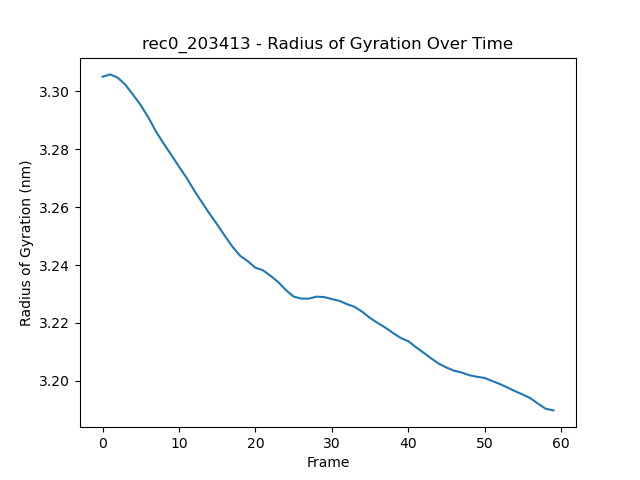

In [6]:
Image(filename=path_1)

In [7]:
Image(filename=path_2)

ValueError: Cannot embed the '' image format